In [56]:
import os
import cv2
import yaml
import numpy as np
import matplotlib.pyplot as plt

In [57]:
raw_image = cv2.imread("./img/cam1_image_raw.png")
raw_image_scaled = cv2.imread("./img/cam1_image_scaled.png")

In [58]:
def load_matrix_from_yaml( filename):
    with open(filename, 'r') as file:
        calibration_param = yaml.load(file, Loader=yaml.FullLoader)
        camera_matrix = np.array(calibration_param.get('camera_matrix'))
        distortion_coeff = np.array(calibration_param.get('distortion_coefficients'))
    return camera_matrix, distortion_coeff

In [59]:

camera_matrix, dist_coeffs = load_matrix_from_yaml("./../cameracalibration/Calibration_camera_1.yaml")
camera_matrix_scaled, dist_coeffs_scaled = load_matrix_from_yaml("./../cameracalibration/Calibration_camera_scaled_1.yaml")


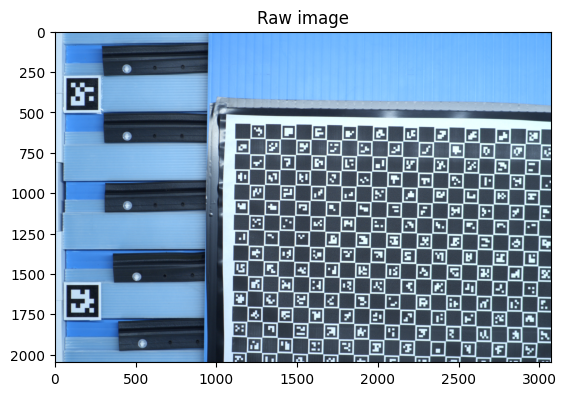

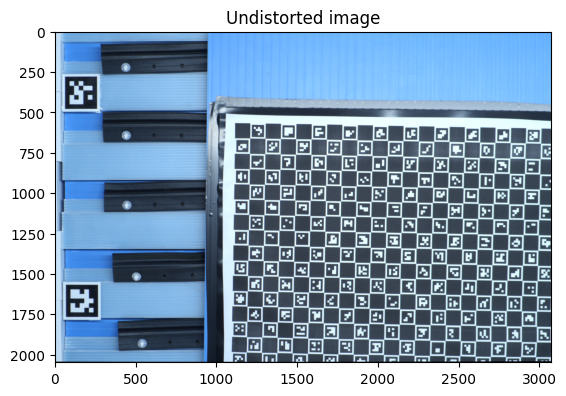

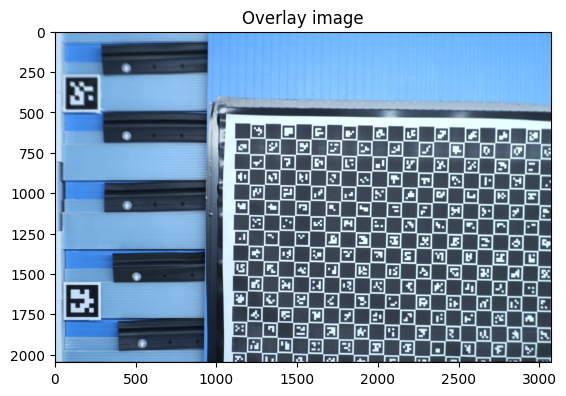

In [60]:
plt.imshow(raw_image)
plt.title('Raw image')
plt.show()
#undistort image
undistorted_image = cv2.undistort(raw_image, camera_matrix, dist_coeffs)
plt.imshow(undistorted_image)
#add title
plt.title('Undistorted image')
plt.show()
#overlay image and undisorted image
overlay = cv2.addWeighted(raw_image, 0.5, undistorted_image, 0.5, 0)
plt.imshow(overlay)
plt.title('Overlay image')
#bgr to rgb
overlay = cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB)
cv2.imwrite("./img/cam1_image_raw_undistorted_overlay.png", overlay)
plt.show()

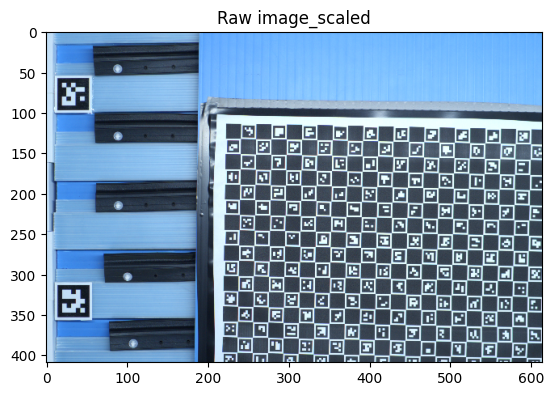

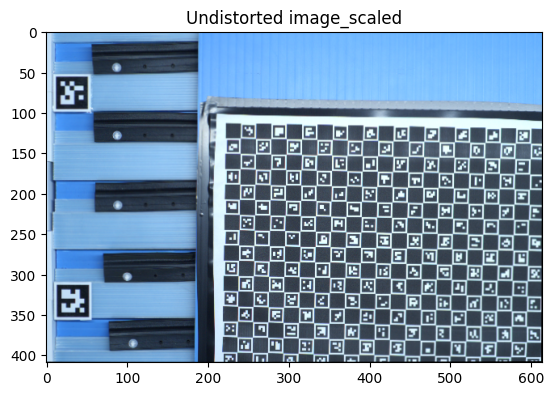

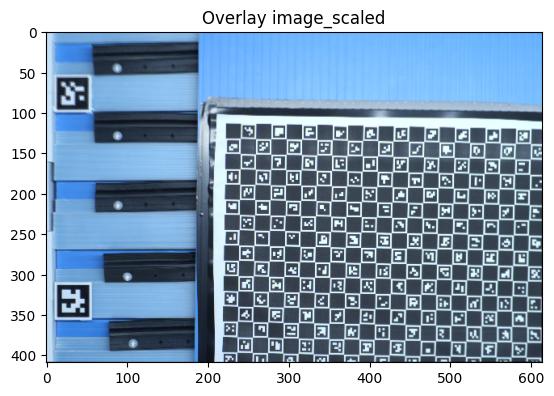

In [62]:
plt.imshow(raw_image_scaled)
plt.title('Raw image_scaled')
plt.show()
#undistort image
undistorted_image_scaled = cv2.undistort(raw_image_scaled, camera_matrix_scaled, dist_coeffs_scaled)
plt.imshow(undistorted_image_scaled)
#add title
plt.title('Undistorted image_scaled')
plt.show()
#overlay image and undisorted image
overlay_scaled = cv2.addWeighted(raw_image_scaled, 0.5, undistorted_image_scaled, 0.5, 0)
plt.imshow(overlay_scaled)
plt.title('Overlay image_scaled')
#bgr to rgb
overlay_scaled = cv2.cvtColor(overlay_scaled, cv2.COLOR_BGR2RGB)
cv2.imwrite("./img/cam1_image_raw_undistorted_overlay_scaled.png", overlay_scaled)
plt.show()